# Code to generate the plots for the manuscript

In [1]:
#import os
#os.environ["OMP_NUM_THREADS"] = '1'
import sys
sys.path.append('G:\\My Drive\\Data\\autonomous\\nse_bayes')
import MyPlotting as MyPlots
import matplotlib.pyplot as plt
from datastruct import Settings, Experiment, ExperimentStep, DataPoint
from entropy import calc_entropy, default_entropy_options
import numpy as np
import imageio

from typing import List


C:\Users\dph\AppData\Local\Temp\ipykernel_22648\1568414517.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


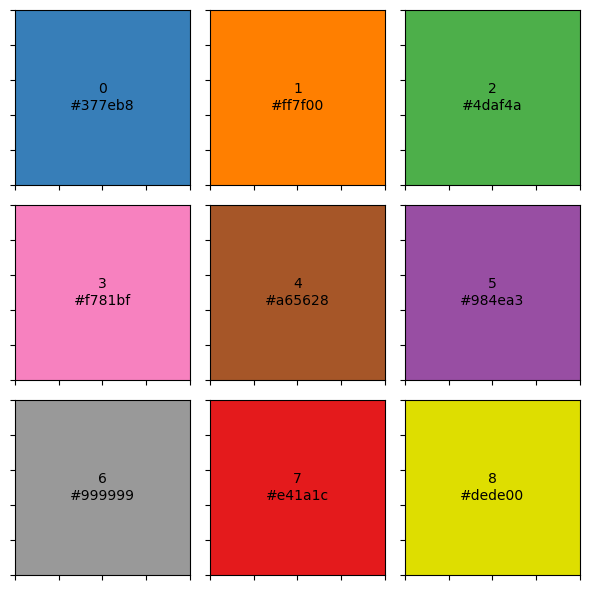

In [3]:
from cycler import cycler
from matplotlib.patches import Rectangle

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

default_cycler = cycler(color=CB_color_cycle)

plt.rcParams['axes.prop_cycle'] = default_cycler

fig, axs = plt.subplots(3, 3, figsize=(6,6))

for i, (c, ax) in enumerate(zip(CB_color_cycle, axs.flatten())):

    ax.add_artist(Rectangle((0,0), 1, 1, color=c))
    ax.text(0.5, 0.5, f'{i}\n{c}', ha='center', va='center')
    ax.tick_params(labelbottom=False, labelleft=False)

fig.tight_layout()
fig.show()

In [4]:
from importlib import reload
import MyPlotting as MyPlots
reload(MyPlots)

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 18

In [4]:
path = "FINAL DATA MAY/"
%pwd

'g:\\Shared drives\\auto_nse_echo'

# 0. Reload experiments

In [2]:
class ExperimentComparison:
    control: Experiment | None = None
    hha: Experiment | None = None
    hh0: Experiment | None = None
    um: Experiment | None = None

    def __init__(self, path: str, i: int) -> None:
        self.path = path
        self.idx = i

    def reload_all(self, recalc=False) -> None:
        path = self.path
        i = self.idx
        self.control = Experiment.load(path + f'{i}/test1_control id{i}c.gz',recalc_yprofs=recalc)
        self.hha = Experiment.load(path + f'{i}/test1_entropy id{i}e1.gz', recalc_yprofs=recalc)
        self.hh0 = Experiment.load(path + f'{i}/test1_entropy id{i}e2.gz', recalc_yprofs=recalc)
        self.um = Experiment.load(path + f'{i}/test1_on_the_fly1 id{i}o1.gz', recalc_yprofs=recalc)



# 1. Labeled spin echo function

In [6]:
# Load in data from experiment 3 (+/- 1800 deg)
exp = ExperimentComparison(path, 3)
exp.reload_all()


C:\Users\dph\AppData\Local\Temp\ipykernel_10256\706344994.py:59: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


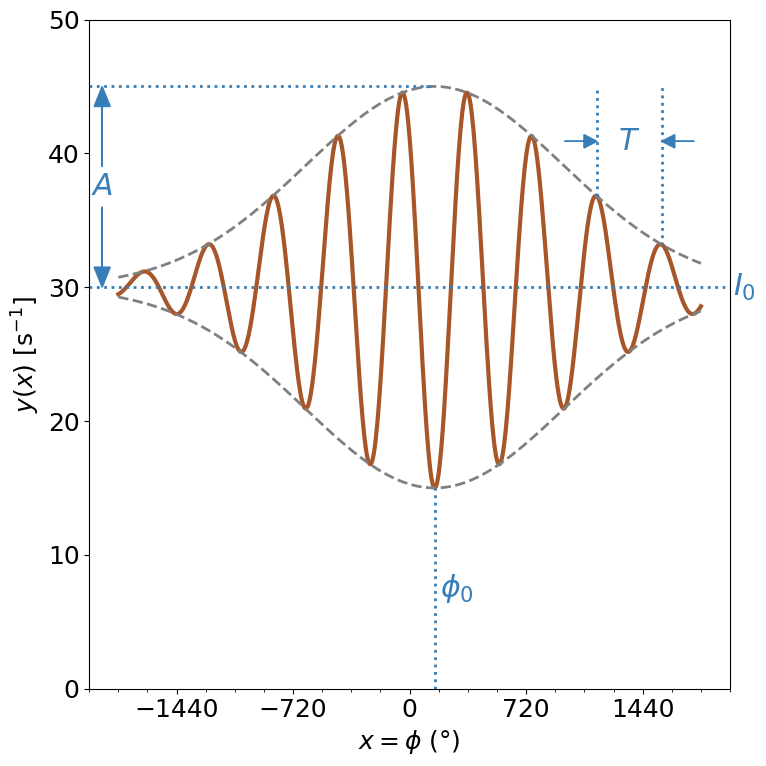

In [68]:
fxn_color = CB_color_cycle[4]
lbl_color = CB_color_cycle[0]
env_color = CB_color_cycle[6]

x = exp.control.settings.x
y = exp.control.truey()
gtp = exp.control.settings.ground_truth_pars
y_envelope = gtp['A'] * np.exp(-(x - gtp['phi0']) ** 2 / (2 * gtp['sigma'] ** 2))
yep = y_envelope + gtp['I0']
yem = -y_envelope + gtp['I0']

fig, ax = plt.subplots(1, 1, figsize=(8,8))

# plot echo function
ax.plot(x, y, color=fxn_color, linewidth=3)

# plot sigmoidal envelope
ax.plot(x, yep, x, yem, color='0.5', linestyle='--')

# plot I0
ax.plot([-1980, gtp['phi0']], np.ones(2) * (gtp['I0'] + gtp['A']), linestyle=':', color=lbl_color)
ax.text(-1900, gtp['I0'] + 0.5 * gtp['A'], r'$A$', fontsize='larger', ha='center', va='center', color=lbl_color)
ax.arrow(-1900, gtp['I0'] + 0.6 * gtp['A'], 0, 0.4 * gtp['A'], color = lbl_color, head_width=100, head_length=0.1*gtp['A'], length_includes_head=True, shape='full', zorder=100)
ax.arrow(-1900, gtp['I0'] + 0.4 * gtp['A'], 0, -0.4 * gtp['A'], color = lbl_color, head_width=100, head_length=0.1*gtp['A'], length_includes_head=True, shape='full', zorder=100)

# plot phi0
#ax.plot([0, 0], [0, gtp['I0'] - gtp['A']], linestyle=':', color=lbl_color)
ax.plot([gtp['phi0'], gtp['phi0']], [0, gtp['I0'] - gtp['A']], linestyle=':', color=lbl_color)
ax.text(gtp['phi0']*1.2, (gtp['I0'] - gtp['A']) * 0.5, r'$\phi_0$', fontsize='larger', ha='left', va='center', color=lbl_color)

# plot A
ax.plot([-1980, 1980], np.ones(2) * gtp['I0'], linestyle=':', color=lbl_color)
ax.text(2000, gtp['I0'], r'$I_0$', fontsize='larger', ha='left', va='center', color=lbl_color)

# plot T
x0 = (gtp['phi0'] + 2.5 * gtp['T'])
x1 = x0 + gtp['T']
y0, y1 = np.interp([x0, x1], x, yep)
y2 = gtp['I0'] + gtp['A']
ylabel = 0.5 * (y0 + y2)
ax.plot([x0, x0], [y0, y2], linestyle=':', color=lbl_color)
ax.plot([x1, x1], [y1, y2], linestyle=':', color=lbl_color)
ax.text(x0 + 0.5 * gtp['T'], ylabel, r'$T$', fontsize='larger', ha='center', va='center', color=lbl_color)
ax.arrow(x0 - 0.5 * gtp['T'], ylabel, 0.5 * gtp['T'], 0, color = lbl_color, head_width=1, head_length=0.2*gtp['T'], length_includes_head=True, shape='full', zorder=100)
ax.arrow(x1 + 0.5 * gtp['T'], ylabel, -0.5 * gtp['T'], 0, color = lbl_color, head_width=1, head_length=0.2*gtp['T'], length_includes_head=True, shape='full', zorder=100)

ax.set_ylim([0, 50])
ax.set_xlim([-1980, 1980])
ax.set_xticks(np.arange(-1440, 1440 + 720, 720), minor=False)
ax.set_xticks(np.arange(-1980, 1980 + 180, 180), minor=True)
ax.tick_params('x', labelbottom=True)

ax.set_xlabel(r'$x=\phi$ ($\degree$)')
#ax1.set_ylabel('Time (s)')
ax.set_ylabel(r'$y(x)$ [s$^{-1}$]')

fig.tight_layout()
fig.savefig('paper_figures/NSEfunction.png', dpi=300)
fig.show()


# 2. Ground truth, data distribution, and time histograms

In [5]:
# Load in data from experiment 3 (+/- 900 deg)
exp = ExperimentComparison(path, 2)
exp.reload_all()

In [365]:
def bins_from_x(x: np.ndarray, binsize: float | None = None):
    
    if binsize is not None:
        bins = np.arange(min(x), max(x)+binsize, binsize)
    else:
    
        dx = np.diff(x)
        bins = 0.5 * (x[1:] + x[:-1])
        bins = np.insert(bins, 0, x[0] - 0.5 * dx[0])
        bins = np.append(bins, x[-1] + 0.5 * dx[-1])

    return bins, 0.5 * (bins[1:] + bins[:-1])


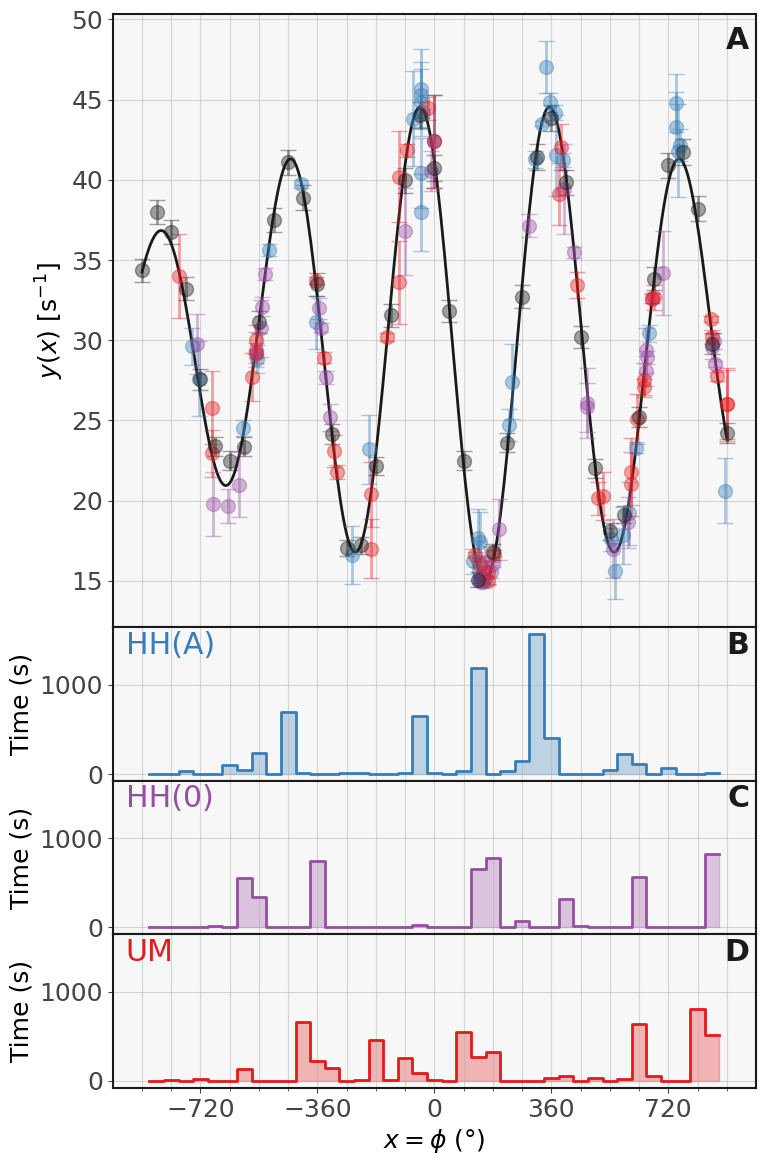

In [389]:
from matplotlib.axes import Axes
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

experiments = [exp.hha, exp.hh0, exp.um, exp.control]
colors = [CB_color_cycle[i] for i in [0, 5, 7]]  + ['0.1']
labels = ['HH(A)', 'HH(0)', 'UM', 'control']

axs: List[Axes] | None = None
fig, axs = plt.subplots(1 + len(experiments) - 1, 1, sharex=True, figsize=(8, 12), height_ratios=[2] + [0.5] * (len(experiments) - 1), gridspec_kw={'hspace': 0})
ax0 = axs[0]
for ax in axs[1:-1]:
    ax.sharey(axs[-1])

# Plot ground truth
ax0.plot(exp.control.settings.x, exp.control.truey(), color='0.1', linewidth=2)

legend_handles = []
legend_labels = []
marker_style=dict(linestyle='', marker='o', markersize=10, alpha=0.4)
line_style=dict(linewidth=2)

for iexp, color, lbl, ax in zip(experiments, colors, labels, list(axs[1:]) + [None]):

    if not iexp.control:
        datax, datay, datady = iexp.getdata()
        t = [pt.meastime for step in iexp.steps for pt in step.points]
    else:
        step = next(step for step in iexp.steps[::-1] if step.meastime() < exp.hha.meastimes()[-1])
        t, datax, datay, datady = [pt.meastime for pt in step.points], \
        [pt.x for pt in step.points], \
        [pt.y for pt in step.points], \
        [pt.dy for pt in step.points]

    t = np.array(t)
    datax = np.array(datax)
    ax0.errorbar(datax, datay, datady, color=color, capsize=6,  **marker_style)

    #legend_handles.append(Line2D([0], [0], color=color, **marker_style, label=''))
    if not iexp.control:
        bins, xb = bins_from_x(iexp.settings.x, binsize=45)
        h, _ = np.histogram(datax[datax<900], bins=bins, weights=t[datax<900])

        p = ax.step(xb, h, color=color)
        ax.fill_between(xb, h, step='pre', color=color, alpha=0.3)
        #legend_handles.append(Patch(edgecolor=color, facecolor=color, alpha=0.3, **line_style, linestyle='-', label=lbl))

        ax.grid(True, which='both', alpha=0.5)
        ax.set_ylabel('Time (s)')
        ax.tick_params('x', labelbottom=False)

        ax.text(0.02, 0.98, lbl, transform=ax.transAxes, fontsize='larger', ha='left', va='top', color=color)
    

    
ax0.grid(True, which='both', alpha=0.5)

axs[-1].set_xticks(np.arange(-720, 720 + 360, 360), minor=False)
axs[-1].set_xticks(np.arange(-900, 900 + 90, 90), minor=True)
axs[-1].tick_params('x', labelbottom=True)

axs[-1].set_xlabel(r'$x=\phi$ ($\degree$)')
#ax1.set_ylabel('Time (s)')
ax0.set_ylabel(r'$y(x)$ [s$^{-1}$]')

#plt.legend(ncol = 2, handles=legend_handles ,loc='upper left', fontsize='smaller')
fig.tight_layout()

for ax, axlbl in zip(axs, ['A', 'B', 'C', 'D', 'E', 'F']):
    ax.text(0.99, 0.98, axlbl, fontsize='larger', fontweight='bold', color='0.1', transform=ax.transAxes, va='top', ha = 'right')

fig.savefig('paper_figures/data_figure.png', dpi=300)


# 3. Parameter improvement

In [428]:
def plot_hist_logtime(explist):

    fig, all_axs = plt.subplots(len(explist), 4, figsize=(24, 12))

    for exp, axs in zip(explist, all_axs):
    
        list_par_separated = MyPlots.getting_list_each_par(exp.load_pts())

        par_names = ['A', r'I$_0$', 'T', r'$\phi_0$']
        par_units = ['counts / s', 'counts / s', r'$\degree$', r'$\degree$']
        totaltimes = exp.totaltimes()
        for i, (ax, par_name, par_unit, lps) in enumerate(zip(axs.flatten(), par_names, par_units, list_par_separated)):
            y_min, y_max = MyPlots.finding_max_min([lps]) 
            fig, ax = MyPlots.plotting_hist_logtime(lps, "Entropy 1 (Selected) MVN", par_name, y_min, y_max, exp.totaltimes(), ax=ax)
            ax.set_ylabel(f'{par_name} ({par_unit})')
            ax.set_xlabel(r'log$_{10}$(Time [s])')        
            ax.set_title('')
            ax.text(0.98, 0.98, par_name, ha='right', va='top', fontweight='bold', fontsize='larger', color='0.9', transform=ax.transAxes)
       

    return fig

C:\Users\dph\AppData\Local\Temp\ipykernel_37496\2763216018.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


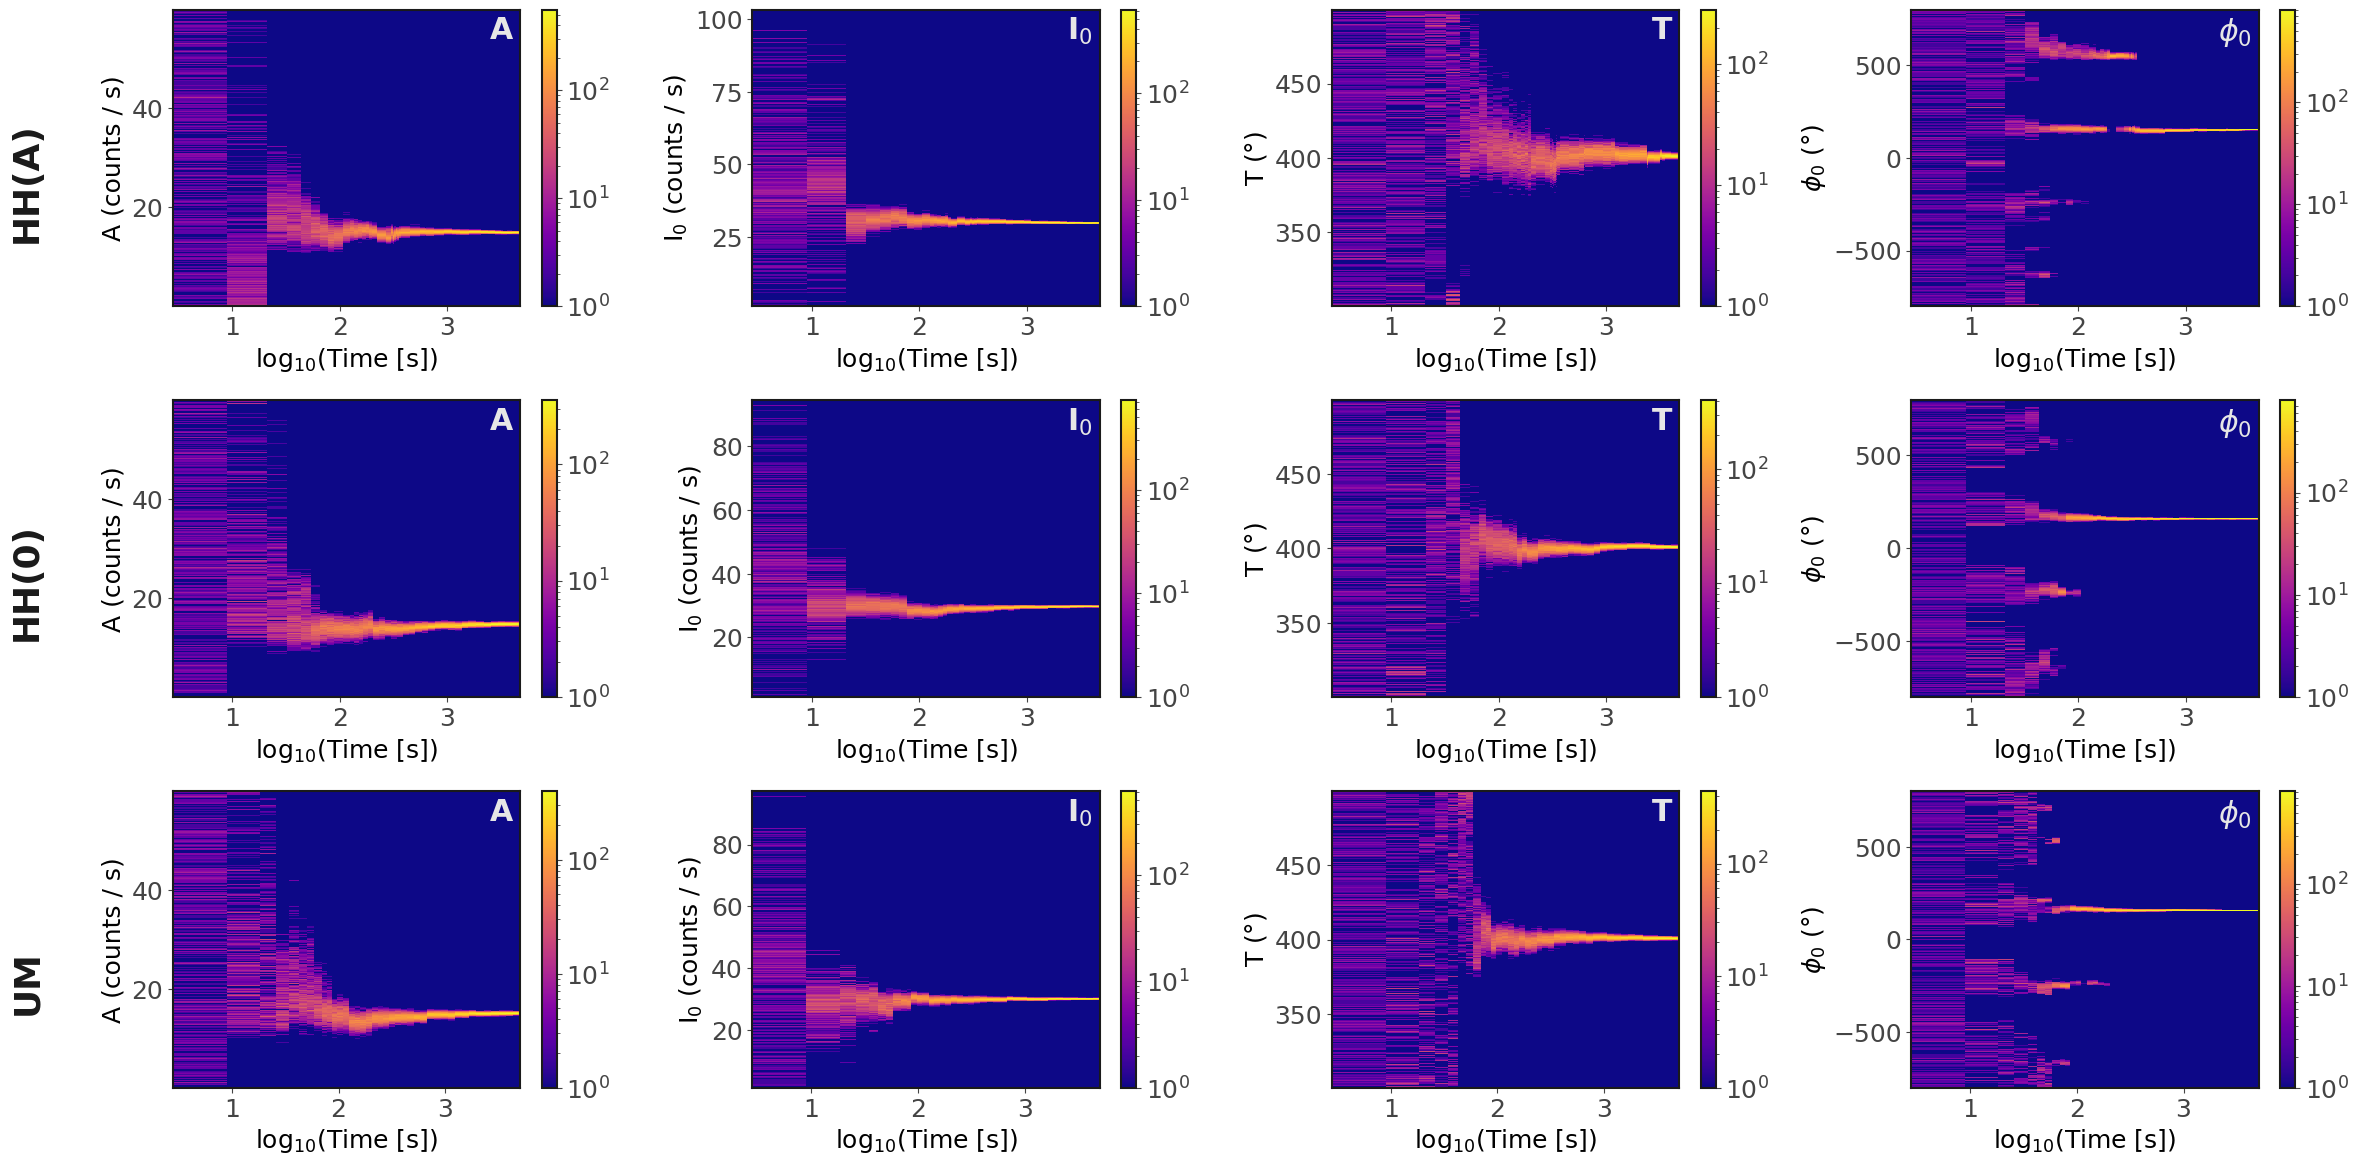

In [429]:
reload(MyPlots)
explist = [exp.hha, exp.hh0, exp.um]
fig = plot_hist_logtime(explist)
fig.text(0.02, 5/6, 'HH(A)', rotation=90, fontsize='x-large', fontweight='bold', color='0.1', va='center', ha='center')
fig.text(0.02, 3/6, 'HH(0)', rotation=90, fontsize='x-large', fontweight='bold', color='0.1', va='center', ha='center')
fig.text(0.02, 1/6, 'UM', rotation=90, fontsize='x-large', fontweight='bold', color='0.1', va='center', ha='center')
fig.tight_layout(rect=(0.04, 0, 1, 1))
fig.savefig('paper_figures/parameter_improvement_both.png', dpi=300)
fig.show()

# 4. Speed improvement demonstration

In [9]:
import functions_gain_factor as Compute

2.335317684798319


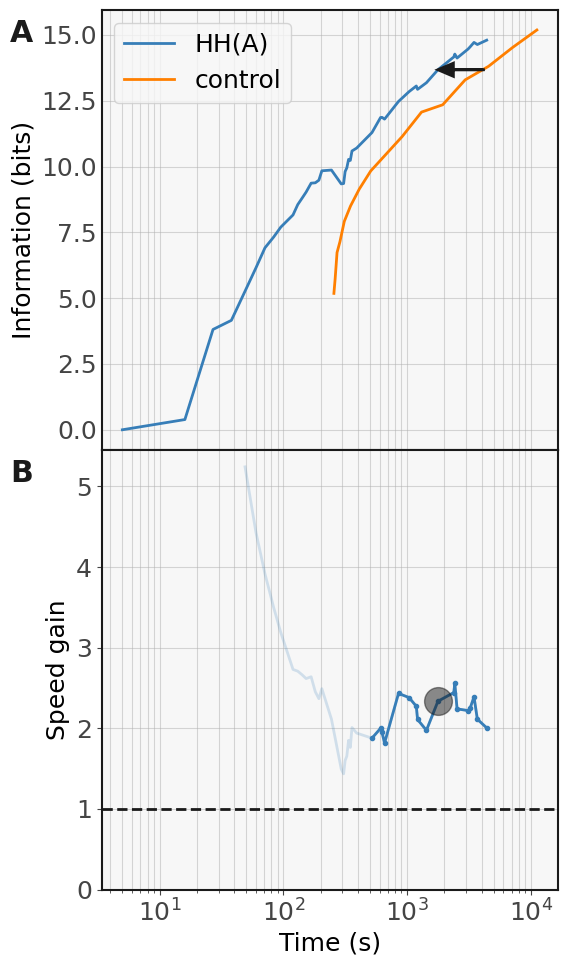

In [437]:
fig, ax = plt.subplots(2, 1, figsize=(6,10), sharex=True, squeeze=True, gridspec_kw={'hspace': 0})

recalc = False

exp_control, exp_entropy1 = exp.control, exp.hha

#Ask REMEMBER THE RETURN OF ENOTROPY_MARG() BC entropy2 does not have a marginal 
times = [exp_entropy1.totaltimes(), exp_control.totaltimes()] 

#Rememeber that the marginal entropy for entropy2 apporach is the same as total entropy since it
#is not selecting any parameters. Thus, we calculate here using the select of any of the other 
#approaches that it must be same. 
#entro = [calc_entropy(this_pts, select_pars=exp_on_the_fly2.settings.sel, 
#                options=exp_entropy2.settings.entropy_options)[0] for this_pts in exp_entropy2.load_pts() ]
e0 = exp_entropy1.entropy_marg()[0]
entropies = [e0 - exp_entropy1.entropy_marg(), e0 - exp_control.entropy_marg()]

MyPlots.plot_entropy_times(times, entropies, [f'HH(A)', f'control'], '', yaxis_title='Information (bits)', ax=ax[0])

times_total, gain_factors_total = Compute.speedgain(exp_entropy1.totaltimes(), exp_entropy1.entropy_marg(), 
                        exp_control.totaltimes(), exp_control.entropy_marg())
#print(times_total, gain_factors_total)
ax[1].grid(which='both', alpha=0.5)
p = ax[1].plot(times_total, gain_factors_total, alpha=0.2)
ax[1].plot(times_total[times_total>0.1*times_total[-1]], gain_factors_total[times_total>0.1*times_total[-1]], color=p[0].get_color(), marker='.')
ax[1].axhline(1.0, color='0.1', linestyle='--', linewidth=2)
ax[1].set_ylim(0, ax[1].get_ylim()[1])
ax[1].set_ylabel('Speed gain')
ax[1].set_xlabel('Time (s)')

# Plot speed gain arrow
#speed_gain_time = 2e3
speed_gain_time = next(t for t in times[0] if t > 1.7e3)
entropy_H = np.interp(speed_gain_time, times[0], entropies[0])
ctrl_time = np.interp(entropy_H, entropies[1], times[1])
print(ctrl_time / speed_gain_time)
ax[0].arrow(ctrl_time, entropy_H, -(ctrl_time - speed_gain_time), 0, color='0.1', linewidth=2, head_width=0.5, head_length=speed_gain_time/3, length_includes_head=True, shape='full', zorder=100)
ax[1].plot(speed_gain_time, ctrl_time/speed_gain_time, 'o', markersize=20, color='0.1', alpha=0.5)

fig.tight_layout()
ax[0].text(-0.15, 0.98, 'A', fontsize='larger', fontweight='bold', color='0.1', transform=ax[0].transAxes, va='top', ha = 'right')
ax[1].text(-0.15, 0.98, 'B', fontsize='larger', fontweight='bold', color='0.1', transform=ax[1].transAxes, va='top', ha = 'right')
fig.savefig('paper_figures/learning_curve_speed_gain.png', dpi=300)
plt.show()


# Load speed gain data

In [432]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('individual_points_marg_all_gmm.xlsx')
dft = pd.read_excel('individual_points_total_all_gmm.xlsx')
df.columns
df.type.unique()

array(['Entropy 1', 'Entropy 2', 'On-the-fly 1', 'On-the-fly 2'],
      dtype=object)

# 5. Search space dependence



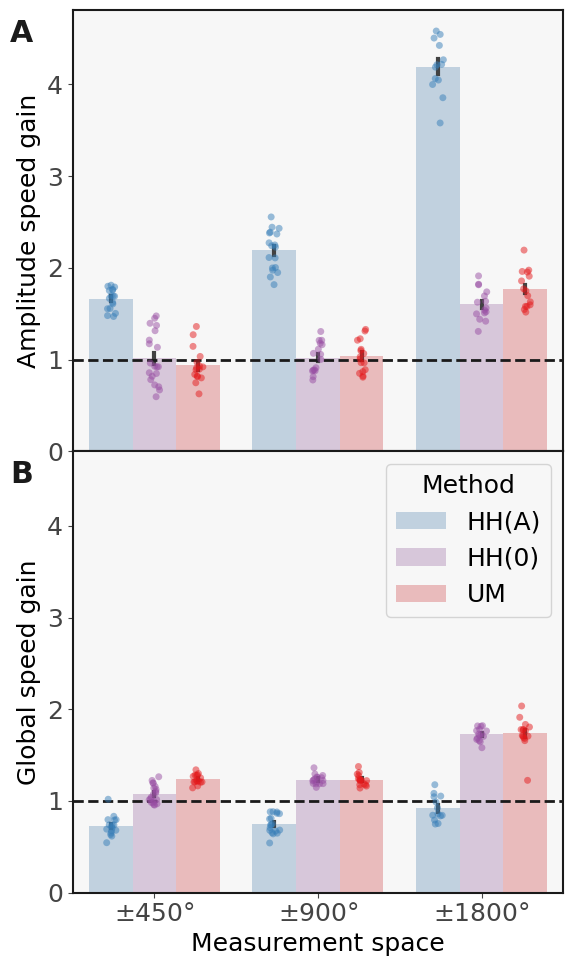

In [441]:
# search space

nice_labels = {1: r"$\pm450\degree$", 2: r"$\pm900\degree$", 3: r"$\pm1800\degree$"}
type_labels = {'Entropy 1': 'HH(A)', 'Entropy 2': 'HH(0)', 'On-the-fly 1': 'UM'}
df_space = df[df['Row_ID'].isin([1, 2, 3])]
df_space = df_space.assign(**{'Measurement space': lambda x: x.Row_ID.map(nice_labels)})

dft_space = dft[dft['Row_ID'].isin([1, 2, 3])]
dft_space = dft_space.assign(**{'Measurement space': lambda x: x.Row_ID.map(nice_labels)})

df_space['Amplitude speed gain'] = df_space['marginal_speed_factor']
df_space = df_space.assign(**{'type': lambda x: x.type.map(type_labels)})
df_space['Method'] = df_space['type']

dft_space['Global speed gain'] = dft_space['total_speed_factor']
dft_space = dft_space.assign(**{'type': lambda x: x.type.map(type_labels)})
dft_space['Method'] = dft_space['type']

#plt.rcParams['font.size'] = 20
fig, (ax, axg) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(6,10), gridspec_kw={'hspace': 0})

with sns.color_palette([CB_color_cycle[i] for i in [0, 5, 7, 1, 2, 3, 4, 8]]):

    # Marginalized data
    sns.barplot(x = "Measurement space",       # x variable name
                y = "Amplitude speed gain",       # y variable name
                hue = "Method",  # group variable name
                data = df_space,     # dataframe to plot
                ax=ax, alpha=0.3,
                errorbar=('ci', 68), legend=False)

    sns.stripplot(x = "Measurement space",       # x variable name
                y = "Amplitude speed gain",       # y variable name
                dodge=True,
                hue = "Method",  # group variable name
                data = df_space,     # dataframe to plot
                ax=ax, alpha=0.5, legend=False)

    ax.axhline(1.0, linestyle='--', color='0.1')
    #ax.set_title('Marginalized')

    # Global data
    sns.barplot(x = "Measurement space",       # x variable name
                y = "Global speed gain",       # y variable name
                hue = "Method",  # group variable name
                data = dft_space,     # dataframe to plot
                ax=axg, alpha=0.3,
                errorbar=('ci', 68), legend=True)

    sns.stripplot(x = "Measurement space",       # x variable name
                y = "Global speed gain",       # y variable name
                dodge=True,
                hue = "Method",  # group variable name
                data = dft_space,     # dataframe to plot
                ax=axg, alpha=0.5, legend=False)

    axg.axhline(1.0, linestyle='--', color='0.1')

fig.tight_layout()
ax.text(-0.08, 0.98, 'A', fontsize='larger', fontweight='bold', color='0.1', transform=ax.transAxes, va='top', ha = 'right')
axg.text(-0.08, 0.98, 'B', fontsize='larger', fontweight='bold', color='0.1', transform=axg.transAxes, va='top', ha = 'right')

fig.savefig('paper_figures/results_measurement_space.png', dpi=300)


# 6. Signal to noise ratio

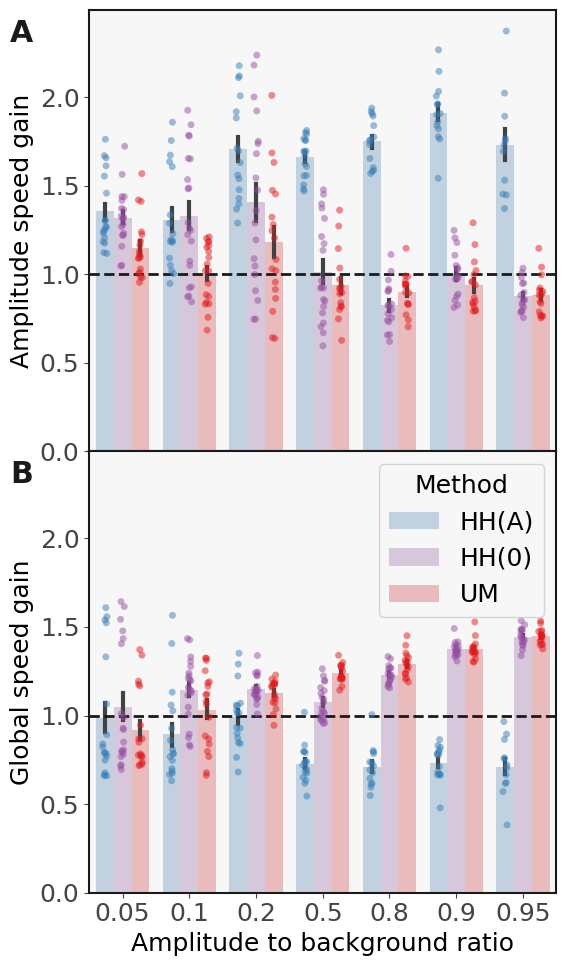

In [445]:
xlabel = 'Amplitude to background ratio'

nice_labels = {1: 0.5, 4: 0.05, 5: 0.1, 6: 0.2, 7: 0.8, 8: 0.9, 9: 0.95}
type_labels = {'Entropy 1': 'HH(A)', 'Entropy 2': 'HH(0)', 'On-the-fly 1': 'UM'}
df_space = df[df['Row_ID'].isin(nice_labels.keys())]
df_space = df_space.assign(**{xlabel: lambda x: x.Row_ID.map(nice_labels)})

dft_space = dft[dft['Row_ID'].isin(nice_labels.keys())]
dft_space = dft_space.assign(**{xlabel: lambda x: x.Row_ID.map(nice_labels)})

df_space['Amplitude speed gain'] = df_space['marginal_speed_factor']
df_space = df_space.assign(**{'type': lambda x: x.type.map(type_labels)})
df_space['Method'] = df_space['type']

dft_space['Global speed gain'] = dft_space['total_speed_factor']
dft_space = dft_space.assign(**{'type': lambda x: x.type.map(type_labels)})
dft_space['Method'] = dft_space['type']

#plt.rcParams['font.size'] = 20
fig, (ax, axg) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(6,10), gridspec_kw={'hspace': 0})

with sns.color_palette([CB_color_cycle[i] for i in [0, 5, 7, 1, 2, 3, 4, 8]]):

    # Marginalized data
    sns.barplot(x = xlabel,       # x variable name
                y = "Amplitude speed gain",       # y variable name
                hue = "Method",  # group variable name
                data = df_space,     # dataframe to plot
                ax=ax, alpha=0.3,
                errorbar=('ci', 68), legend=False)

    sns.stripplot(x = xlabel,       # x variable name
                y = "Amplitude speed gain",       # y variable name
                dodge=True,
                hue = "Method",  # group variable name
                data = df_space,     # dataframe to plot
                ax=ax, alpha=0.5, legend=False)

    ax.axhline(1.0, linestyle='--', color='0.1')
    #ax.set_title('Marginalized')

    # Global data
    sns.barplot(x = xlabel,       # x variable name
                y = "Global speed gain",       # y variable name
                hue = "Method",  # group variable name
                data = dft_space,     # dataframe to plot
                ax=axg, alpha=0.3,
                errorbar=('ci', 68), legend=True)

    sns.stripplot(x = xlabel,       # x variable name
                y = "Global speed gain",       # y variable name
                dodge=True,
                hue = "Method",  # group variable name
                data = dft_space,     # dataframe to plot
                ax=axg, alpha=0.5, legend=False)

    axg.axhline(1.0, linestyle='--', color='0.1')

fig.tight_layout()

ax.text(-0.12, 0.98, 'A', fontsize='larger', fontweight='bold', color='0.1', transform=ax.transAxes, va='top', ha = 'right')
axg.text(-0.12, 0.98, 'B', fontsize='larger', fontweight='bold', color='0.1', transform=axg.transAxes, va='top', ha = 'right')

fig.savefig('paper_figures/results_snr.png', dpi=300)



# 7. Aggressiveness factor

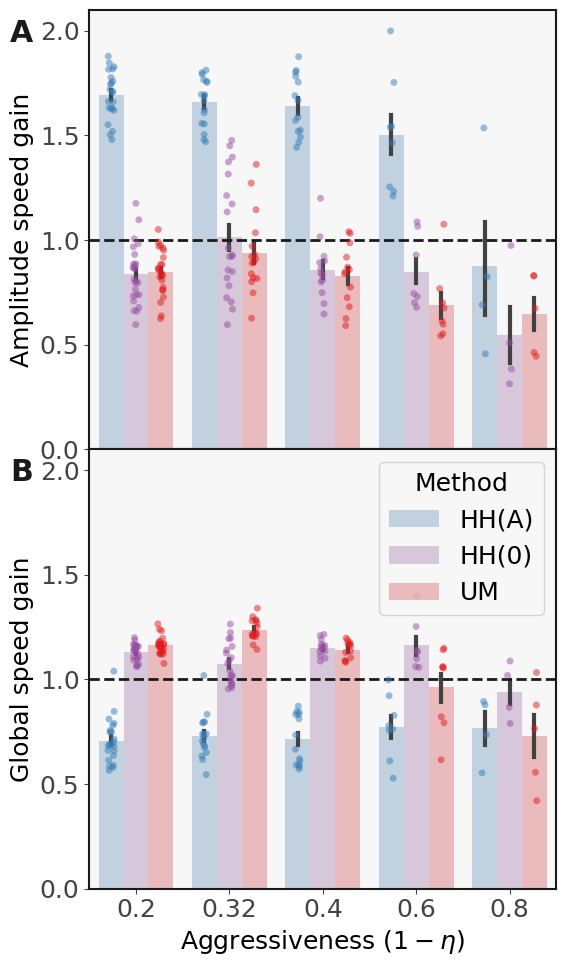

In [446]:
xlabel = 'Aggressiveness factor'
nice_xlabel = r'Aggressiveness ($1-\eta$)'

nice_labels = {1: 0.32, 12: 0.2, 13:0.4, 14:0.6, 15:0.8}
type_labels = {'Entropy 1': 'HH(A)', 'Entropy 2': 'HH(0)', 'On-the-fly 1': 'UM'}
df_space = df[df['Row_ID'].isin(nice_labels.keys())]
df_space = df_space.assign(**{xlabel: lambda x: x.Row_ID.map(nice_labels)})

dft_space = dft[dft['Row_ID'].isin(nice_labels.keys())]
dft_space = dft_space.assign(**{xlabel: lambda x: x.Row_ID.map(nice_labels)})

df_space['Amplitude speed gain'] = df_space['marginal_speed_factor']
df_space = df_space.assign(**{'type': lambda x: x.type.map(type_labels)})
df_space['Method'] = df_space['type']
df_space[nice_xlabel] = df_space[xlabel]

dft_space['Global speed gain'] = dft_space['total_speed_factor']
dft_space = dft_space.assign(**{'type': lambda x: x.type.map(type_labels)})
dft_space['Method'] = dft_space['type']
dft_space[nice_xlabel] = dft_space[xlabel]

#plt.rcParams['font.size'] = 18
fig, (ax, axg) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(6,10), gridspec_kw={'hspace': 0})

with sns.color_palette([CB_color_cycle[i] for i in [0, 5, 7, 1, 2, 3, 4, 8]]):

    # Marginalized data
    sns.barplot(x = nice_xlabel,       # x variable name
                y = "Amplitude speed gain",       # y variable name
                hue = "Method",  # group variable name
                data = df_space,     # dataframe to plot
                ax=ax, alpha=0.3,
                errorbar=('ci', 68), legend=False)

    sns.stripplot(x = nice_xlabel,       # x variable name
                y = "Amplitude speed gain",       # y variable name
                dodge=True,
                hue = "Method",  # group variable name
                data = df_space,     # dataframe to plot
                ax=ax, alpha=0.5, legend=False)

    ax.axhline(1.0, linestyle='--', color='0.1')
    #ax.set_title('Marginalized')

    # Global data
    g = sns.barplot(x = nice_xlabel,       # x variable name
                y = "Global speed gain",       # y variable name
                hue = "Method",  # group variable name
                data = dft_space,     # dataframe to plot
                ax=axg, alpha=0.3,
                errorbar=('ci', 68), legend=True)

    sns.stripplot(x = nice_xlabel,       # x variable name
                y = "Global speed gain",       # y variable name
                dodge=True,
                hue = "Method",  # group variable name
                data = dft_space,     # dataframe to plot
                ax=axg, alpha=0.5, legend=False)

    axg.axhline(1.0, linestyle='--', color='0.1')

fig.tight_layout()

ax.text(-0.12, 0.98, 'A', fontsize='larger', fontweight='bold', color='0.1', transform=ax.transAxes, va='top', ha = 'right')
axg.text(-0.12, 0.98, 'B', fontsize='larger', fontweight='bold', color='0.1', transform=axg.transAxes, va='top', ha = 'right')

fig.savefig('paper_figures/results_aggressiveness.png', dpi=300)



# S1. Characteristics of ABR learning curves

In [7]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple, HandlerBase
from cycler import cycler

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

default_cycler = cycler(color=CB_color_cycle)

plt.rcParams['axes.prop_cycle'] = default_cycler

# from https://stackoverflow.com/questions/41752309/single-legend-item-with-two-lines
class AnyObjectHandler(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        l1 = plt.Line2D([x0,y0+width], [0.7*height,0.7*height],
                           linestyle=orig_handle[1], color=orig_handle[0])
        l2 = plt.Line2D([x0,y0+width], [0.3*height,0.3*height], 
                           color=orig_handle[0], linestyle=orig_handle[2])
        return [l1, l2]

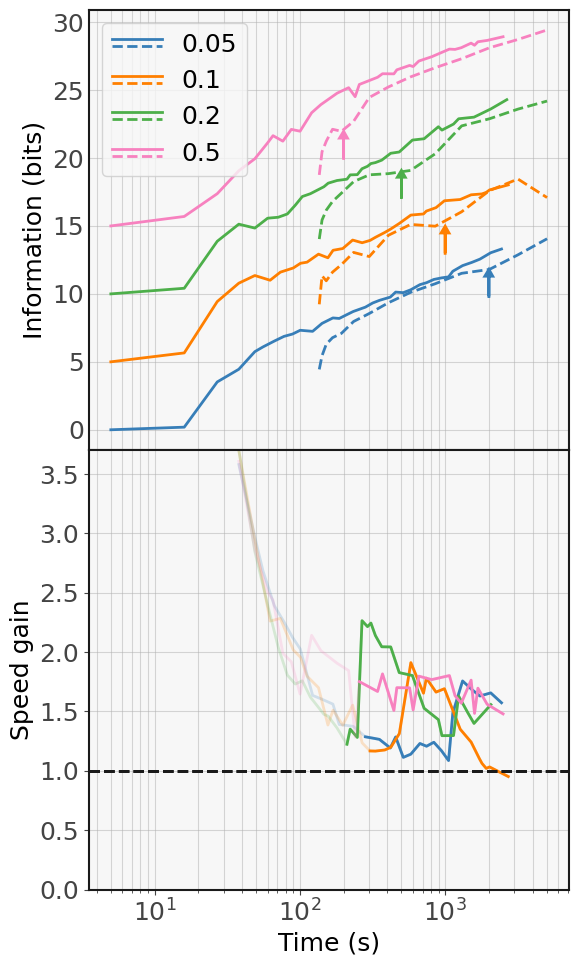

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(6,10), sharex=True, squeeze=True, gridspec_kw={'hspace': 0})

recalc = False
legend_entries = [] 
legend_labels = []

labels = {4: '0.05', 5: '0.1', 6: '0.2', 1: '0.5', 7: '0.8', 8: '0.9', 9: '0.95'}
arrowposition = {4: 2000., 5: 1000., 6: 500., 1: 200., 7: None, 8: None, 9: None}

for ii, i in enumerate([4, 5, 6, 1]):

    offset = 5 * ii

    exp = ExperimentComparison(path, i)
    exp.reload_all(recalc=recalc)
    exp_control, exp_entropy1 = exp.control, exp.hha

    #Ask REMEMBER THE RETURN OF ENOTROPY_MARG() BC entropy2 does not have a marginal 
    times = [exp_entropy1.totaltimes(), exp_control.totaltimes()] 

    #Rememeber that the marginal entropy for entropy2 apporach is the same as total entropy since it
    #is not selecting any parameters. Thus, we calculate here using the select of any of the other 
    #approaches that it must be same. 
    #entro = [calc_entropy(this_pts, select_pars=exp_on_the_fly2.settings.sel, 
    #                options=exp_entropy2.settings.entropy_options)[0] for this_pts in exp_entropy2.load_pts() ]
    e0 = exp_entropy1.entropy_marg()[0] + offset
    entropies = [e0 - exp_entropy1.entropy_marg(), e0 - exp_control.entropy_marg()]

    MyPlots.plot_entropy_times(times, entropies, [f'auto{i}', f'control{i}'], '', yaxis_title='Information (bits)', ax=ax[0])

    times_total, gain_factors_total = Compute.speedgain(exp_entropy1.totaltimes(), exp_entropy1.entropy_marg(), 
                            exp_control.totaltimes(), exp_control.entropy_marg())
    
    #print(times_total, gain_factors_total)
    ax[1].grid(which='both', alpha=0.5)
    p = ax[1].plot(times_total, gain_factors_total, alpha=0.2)
    ax[1].plot(times_total[times_total>0.1*times_total[-1]], gain_factors_total[times_total>0.1*times_total[-1]], color=p[0].get_color())
    ax[0].get_lines()[-2].set_color(p[0].get_color())
    ax[0].get_lines()[-1].set_color(p[0].get_color())
    ax[0].get_lines()[-1].set_linestyle('--')
    legend_entries.append((p[0].get_color(), '-', '--'))
    legend_labels.append(labels[i])

    if arrowposition[i] is not None:
        distance = np.abs(exp_control.totaltimes() - arrowposition[i])
        arrowtimeidx = np.where(min(distance) == distance)[0][0]
        arrowtime = exp_control.totaltimes()[arrowtimeidx]
        ax[0].arrow(arrowposition[i], entropies[1][arrowtimeidx] -2, 0, 2, color=p[0].get_color(), linewidth=2, head_width=arrowposition[i]/8, head_length=0.5, length_includes_head=True, shape='full', zorder=100)
    ax[1].axhline(1.0, color='0.1', linestyle='--', linewidth=2)
    ax[1].set_ylim(0, ax[1].get_ylim()[1])
    ax[1].set_ylabel('Speed gain')
    ax[1].set_xlabel('Time (s)')

ax[0].legend(legend_entries, legend_labels, handler_map={tuple: AnyObjectHandler()})
fig.tight_layout()
fig.savefig('performance_abr.png')

plt.show()

# S2. Amplitude parameter improvement with ABR

In [34]:
def plot_hist_logtime_Aonly(explist):

    fig, all_axs = plt.subplots(len(explist), 1, squeeze=False,  figsize=(24, 12))

    for exp, axs in zip(explist, all_axs):
    
        list_par_separated = MyPlots.getting_list_each_par(exp.load_pts())

        par_names = ['A']
        par_units = ['counts / s']
        totaltimes = exp.totaltimes()
        for i, (ax, par_name, par_unit, lps) in enumerate(zip(axs.flatten(), par_names, par_units, list_par_separated)):
            y_min, y_max = MyPlots.finding_max_min([lps]) 
            fig, ax = MyPlots.plotting_hist_logtime(lps, "Entropy 1 (Selected) MVN", par_name, y_min, y_max, exp.totaltimes(), ax=ax)
            ax.set_ylabel(f'{par_name} ({par_unit})')
            ax.set_xlabel(r'log$_{10}$(Time [s])')        
            ax.set_title('')
            ax.text(0.98, 0.98, par_name, ha='right', va='top', fontweight='bold', fontsize='larger', color='0.9', transform=ax.transAxes)
       

    return fig

C:\Users\dph\AppData\Local\Temp\ipykernel_22648\2337768162.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


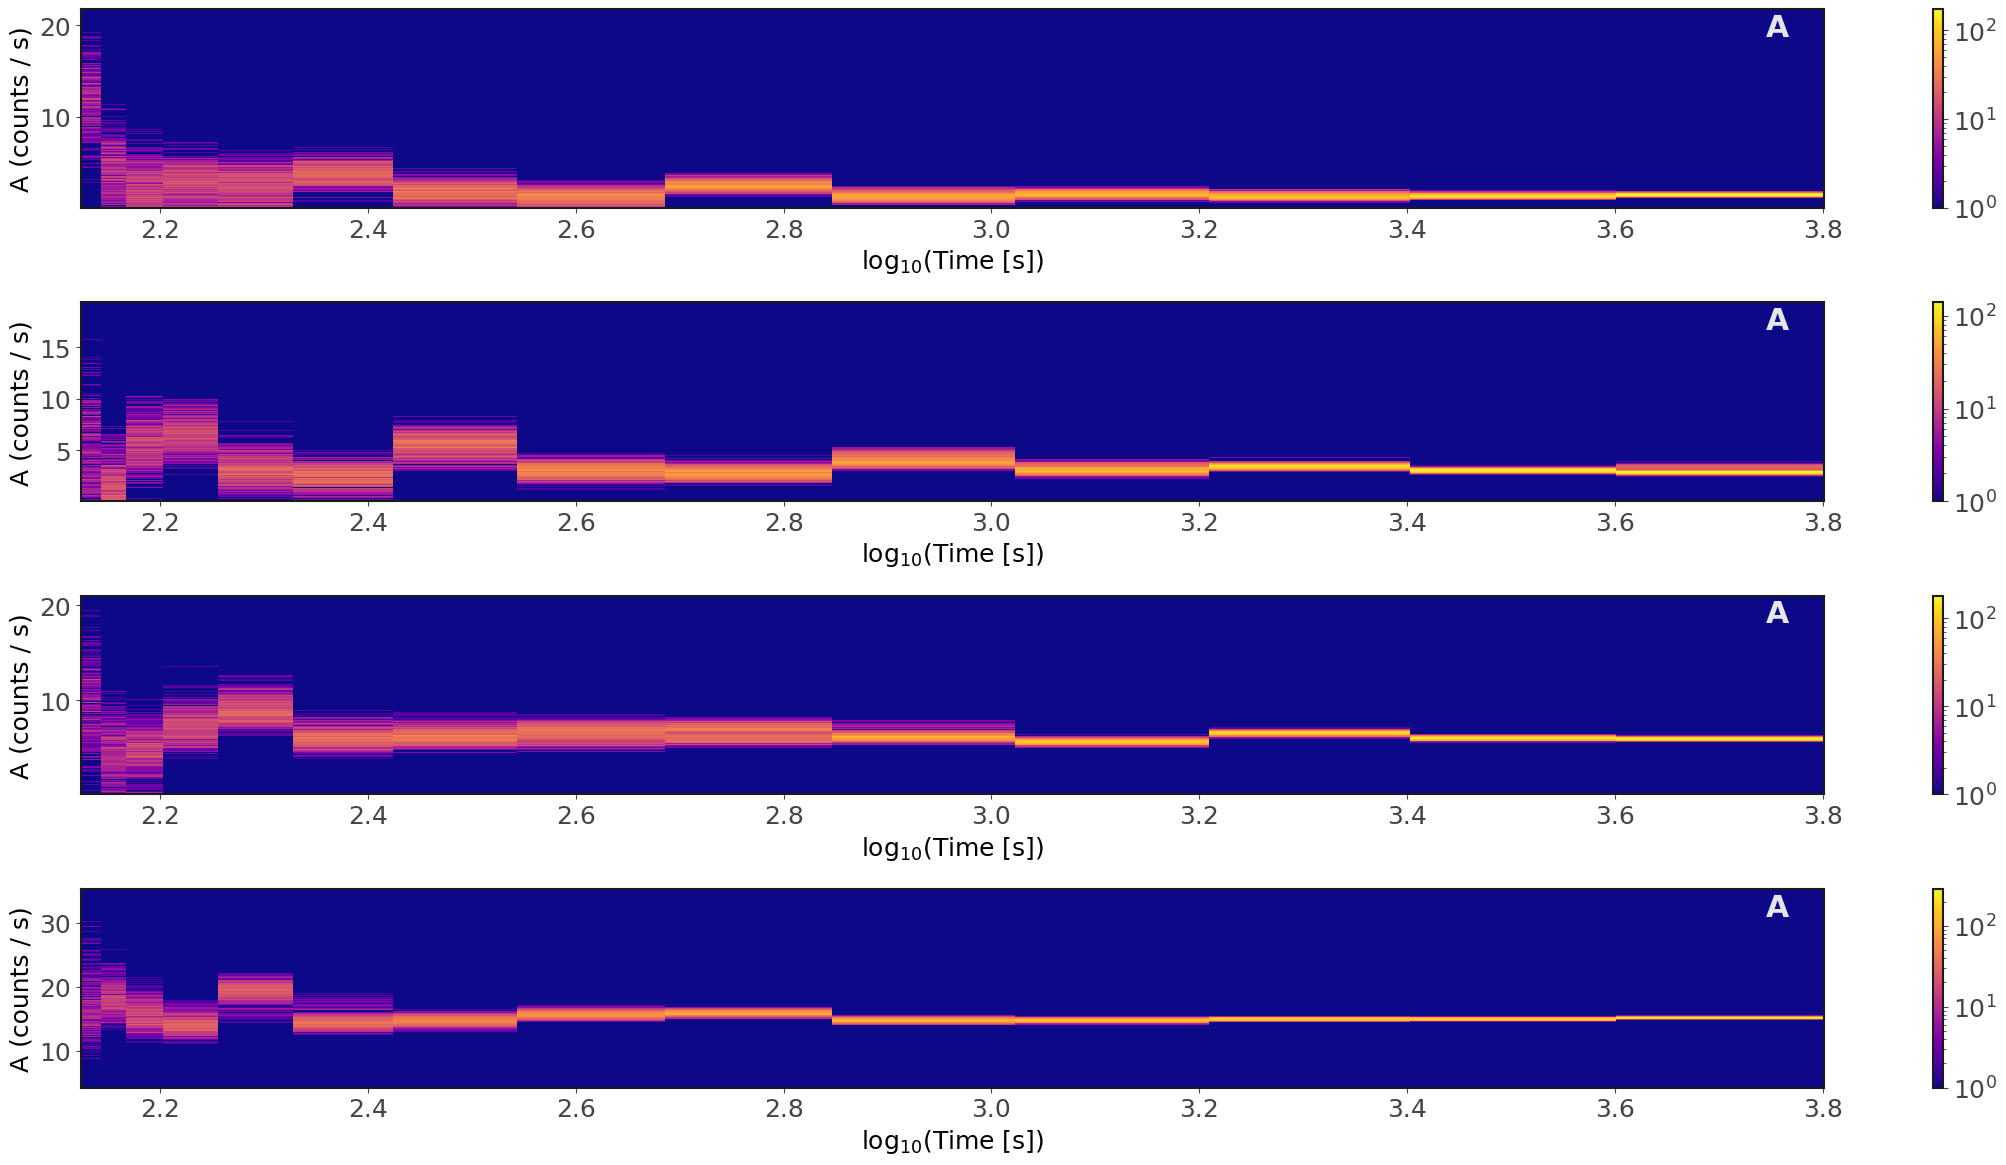

In [35]:
explist = []

for ii, i in enumerate([4, 5, 6, 1]):
    exp = ExperimentComparison(path, i)
    exp.reload_all(False)
    explist.append(exp.control)

fig = plot_hist_logtime_Aonly(explist)
#fig.text(0.02, 5/6, 'HH(A)', rotation=90, fontsize='x-large', fontweight='bold', color='0.1', va='center', ha='center')
#fig.text(0.02, 3/6, 'HH(0)', rotation=90, fontsize='x-large', fontweight='bold', color='0.1', va='center', ha='center')
#fig.text(0.02, 1/6, 'UM', rotation=90, fontsize='x-large', fontweight='bold', color='0.1', va='center', ha='center')
fig.tight_layout(rect=(0.04, 0, 1, 1))
fig.savefig('paper_figures/parameter_improvement_ABR.png', dpi=300)
fig.show()

# S1. Movies

In [6]:
exp = ExperimentComparison(path, 3)
exp.reload_all(recalc=True)


In [14]:
def make_multipanel_movie(fn, explist, titles):
    
    frames = []

    fig = plt.figure(figsize=(4 + 4 * len(explist), 6))

    max_idx = min([len(exp.load_yprofs()) for exp in explist])

    for idx in range(max_idx):
        for i, (exp, title) in enumerate(zip(explist, titles)):
            ax = fig.add_subplot(1, len(explist), i + 1)
            totaltime = exp.totaltimes()[idx]
            MyPlots.plot_y_profiles(exp.load_yprofs()[idx],exp.settings.x,
                                    FOM = None, #exp_entropy1.load_FOM()[idx],
                                    this_title = title, ax=ax)
            x, y, dy = exp.getdata()
            ax.errorbar(x[:idx+1], y[:idx+1], dy[:idx+1], fmt='o', markersize=10, capsize=8, capthick=2, color='1', alpha=0.5, zorder=100)
            ax.text(0.02, 0.98, f'{totaltime:0.0f} s', ha='left', va='top', color='0.9', transform=ax.transAxes)

        fig.tight_layout()
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        frames.append(image)
        fig.clf()

    imageio.mimsave(fn, frames, fps=2)

#make_movie_profiles('entropy_sel_lowsnr.gif', exp_entropy1, title='Selected parameter: A')
#make_movie_profiles('entropy_nosel_lowsnr.gif', exp_entropy2, title='Selected parameter: all')
make_multipanel_movie('compare_point_selection.gif', [exp.hha, exp.hh0, exp.um], ['HH(A)', 'HH(0)', 'UM'])

C:\Users\dph\AppData\Local\Temp\ipykernel_13040\3471443105.py:22: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


<Figure size 1600x600 with 0 Axes>